# 3.Bus EDA

Bus: Jan. 01, 2014 - May 31, 2020

Street car: Jan. 02 2014 - May 31 2020

Subway: Jan. 01 2014 - June 2020 

~700k records of incident delay for the past 6 year 

 Seaborn Distplot represents the overall distribution of continuous data variables
https://www.journaldev.com/39993/seaborn-distplot#:~:text=Seaborn%20Distplot%20represents%20the%20overall,line%20in%20combination%20to%20it.

https://seaborn.pydata.org/tutorial/categorical.html

https://towardsdatascience.com/data-visualization-which-graphs-should-i-use-55e214ee9cf1

https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization

95th percentile : http://www2.arnes.si/~gljsentvid10/pct.html#:~:text=A%2095th%20percentile%20says%20that,(saturated)%20half%20the%20time.

understanding boxplots :https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

quartile: https://en.wikipedia.org/wiki/Quartile#:~:text=The%20first%20quartile%20(Q1,median%20of%20the%20data%20set.&text=The%20second%20quartile%20(Q2,value%20of%20the%20data%20set.

Data Visualization with Python Seaborn and Pandas: https://www.journaldev.com/40374/data-visualization-seaborn-pandas (https://www.journaldev.com/python/python-modules)

categorical: https://seaborn.pydata.org/tutorial/categorical.html

visualization with seaborn: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

What are categorical, discrete, and continuous variables?: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/#:~:text=Categorical%20variables%20contain%20a%20finite%20number%20of%20categories%20or%20distinct%20groups.&text=For%20example%2C%20categorical%20predictors%20include,values%20between%20any%20two%20values.

## 3.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns

In [2]:
bus_df = pd.read_csv('./data/bus_cleaned.csv')

## 3.2 Overview

In [3]:
bus_df.head()

,exact_date,route_num,exact_time,day_of_week,location,incident,delay_min,gap_min,direction,vehicle,year,month,day,hour,min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N


In [4]:
print("There's %s records of incident and %s columns in the bus dataset."%(bus_df.shape[0],bus_df.shape[1]))

There's 461405 records of incident and 18 columns in the bus dataset.


In [5]:
print('The bus dataset starts from %s to %s.'%(bus_df.iloc[0]['exact_date'],bus_df.iloc[-1]['exact_date']))

The bus dataset starts from 2014-01-01 to 2020-05-31.


## 3.3 Check Missing values

In [6]:
missing_vals_bus = (bus_df.isnull().sum() / bus_df.shape[0]) * 100 
missing_vals_bus[missing_vals_bus > 0].sort_values(ascending=False)

vehicle           14.940887
direction          2.103575
direction_simp     0.470953
incident           0.202208
location           0.160380
gap_min            0.121802
dtype: float64

### Insights
- There's a lot of vehicle numbers missing in the bus dataset at about 15%.
- Bound column in the subway dataset has 22% missing values.

In [7]:
bus_df.columns

Index(['exact_date', 'route_num', 'exact_time', 'day_of_week', 'location',
       'incident', 'delay_min', 'gap_min', 'direction', 'vehicle', 'year',
       'month', 'day', 'hour', 'min', 'at_station', 'delay_type',
       'direction_simp'],
      dtype='object')

## 3.4 Analyzing Continuous Variables (using distribution graphs, boxplots, quantiles and correlation matrix)

Continuous variables: report_date, time
Discrete Variables: route, vehicle, report_year, report_month, report_day, report_hour, report_min, delay_min, gap_min 

### 3.4.1 Delay by Exact Date Counts

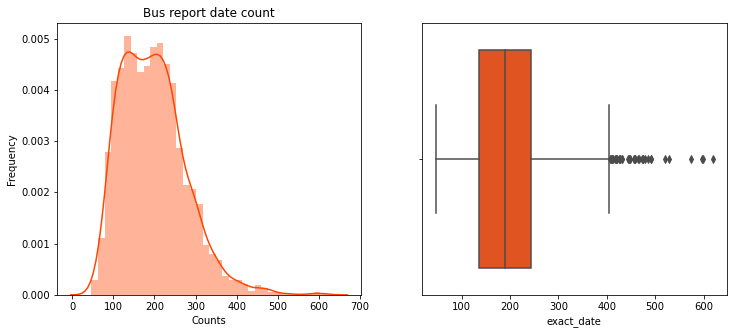

In [8]:
bus_date_counts = bus_df.exact_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Bus report date count");

sns.boxplot(bus_date_counts, ax=ax[1], color="orangered");

In [9]:
# a function to find quantiles, or where most data are.
def compute_quantiles(col_counts):
    Q1 =  np.quantile(col_counts, 0.25)
    Q3 =  np.quantile(col_counts, 0.75)
    IQR = Q3 - Q1
    print('Most data are within %d to %d.'%(Q1,Q3))
    print('Median is', np.quantile(col_counts, 0.5))
    print('The data are usually below %d.'%np.quantile(col_counts, 0.95))
    
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3  + 1.5 * (IQR)
    outlier = col_counts[col_counts < lower_fence].sum() + col_counts[col_counts > upper_fence].sum()
    print('Anything above %d and below %d is an outlier.'%(upper_fence,lower_fence))
    print("There are %d outliers." %outlier)
    print('Maximum occurence is %d of %s.' %(col_counts.max(), col_counts.index[0]))

In [10]:
compute_quantiles(bus_date_counts)

Most data are within 135 to 243.
Median is 190.0
The data are usually below 338.
Anything above 405 and below -27 is an outlier.
There are 17226 outliers.
Maximum occurence is 619 of 2014-01-07.


### Insights
- Most dates have range from roughly 135 to 240 delays.
- More than 340 delays per day is very seldom.
- The most delay per day happened on 2014-01-07 with 619 delays.
- There are 17226 outliers.

### 3.4.2 Delay by Exact Time Counts

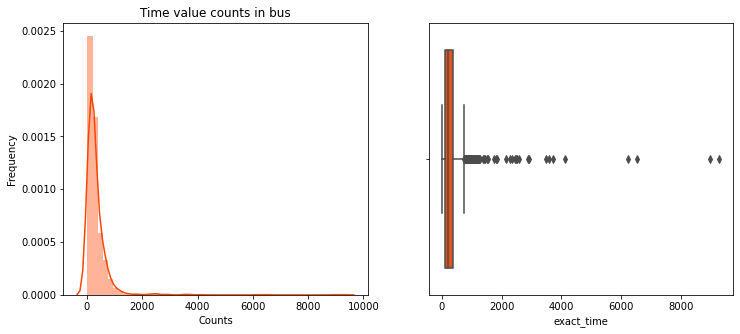

In [11]:
bus_time_counts = bus_df.exact_time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_time_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in bus");

sns.boxplot(bus_time_counts, ax=ax[1], color="orangered");

In [12]:
compute_quantiles(bus_time_counts)

Most data are within 105 to 361.
Median is 213.0
The data are usually below 816.
Anything above 745 and below -279 is an outlier.
There are 145275 outliers.
Maximum occurence is 9280 of 3:00:00 PM.


### Insights
- A heavily right skewed distribution shown above, it is a sign of certain period is prone to have more delays than other period. 
- There's a heavy outlier with 9280 delays at 3PM.
- Most of the time we have 105 to roughly 360 delays.

### 3.4.3 More on continuous variables

In [13]:
# initialize continuous variables
bus_cont = bus_df[['route_num','vehicle','year','month','day','hour','min','delay_min','gap_min']]

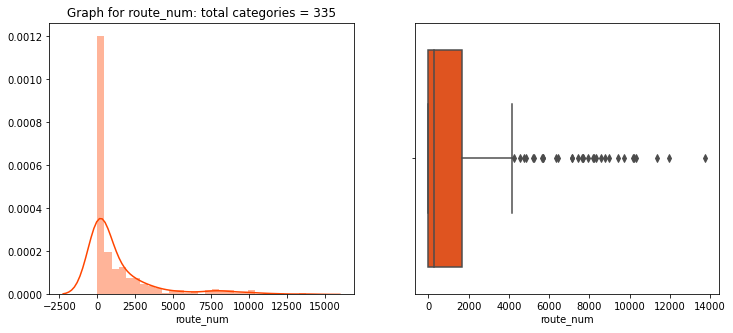

Most data are within 3 to 1656.
Median is 263.0
The data are usually below 7651.
Anything above 4136 and below -2477 is an outlier.
There are 249384 outliers.
Maximum occurence is 13754 of 29.




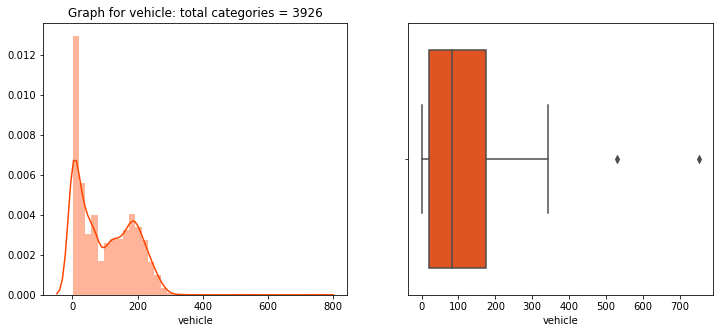

Most data are within 21 to 176.
Median is 82.0
The data are usually below 237.
Anything above 408 and below -211 is an outlier.
There are 1281 outliers.
Maximum occurence is 752 of 0.0.




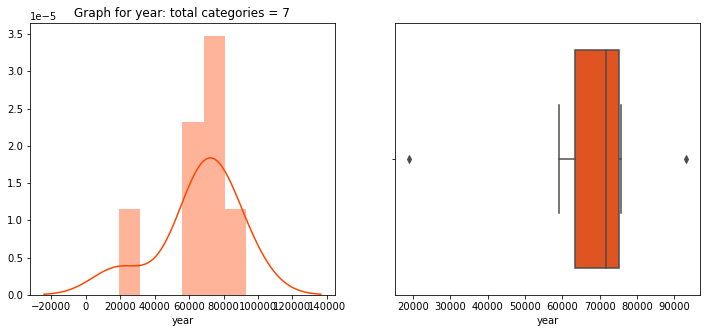

Most data are within 63484 to 75294.
Median is 71687.0
The data are usually below 87857.
Anything above 93009 and below 45769 is an outlier.
There are 112162 outliers.
Maximum occurence is 93090 of 2014.




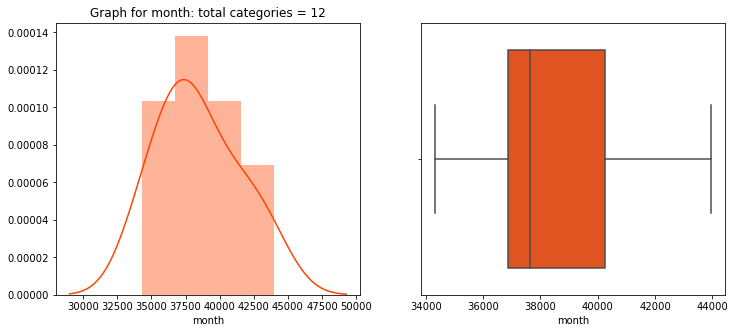

Most data are within 36856 to 40257.
Median is 37621.0
The data are usually below 43151.
Anything above 45359 and below 31755 is an outlier.
There are 0 outliers.
Maximum occurence is 43964 of 1.




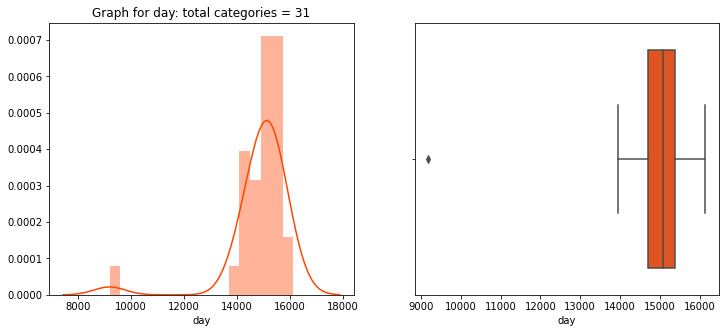

Most data are within 14699 to 15377.
Median is 15081.0
The data are usually below 15871.
Anything above 16393 and below 13683 is an outlier.
There are 9189 outliers.
Maximum occurence is 16131 of 12.




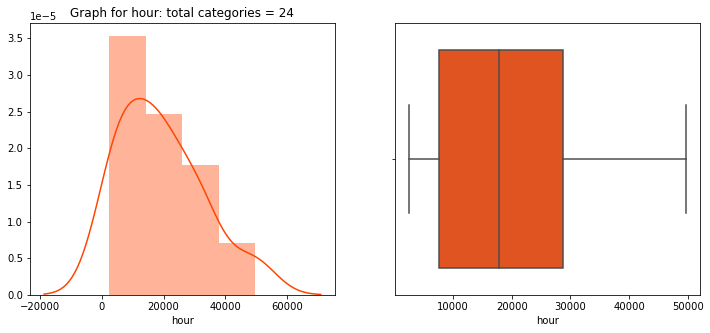

Most data are within 7577 to 28751.
Median is 17858.5
The data are usually below 46521.
Anything above 60512 and below -24183 is an outlier.
There are 0 outliers.
Maximum occurence is 49696 of 6.




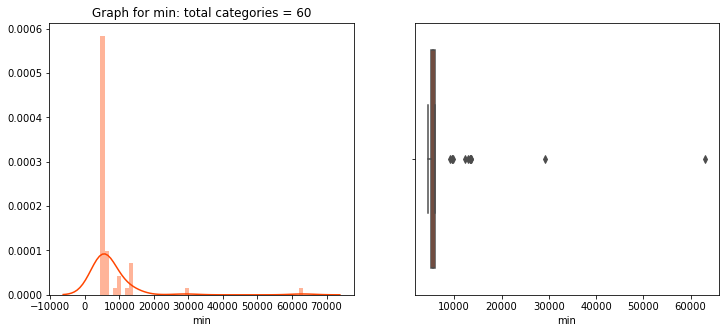

Most data are within 5069 to 5834.
Median is 5434.0
The data are usually below 13442.
Anything above 6981 and below 3923 is an outlier.
There are 208695 outliers.
Maximum occurence is 63058 of 0.




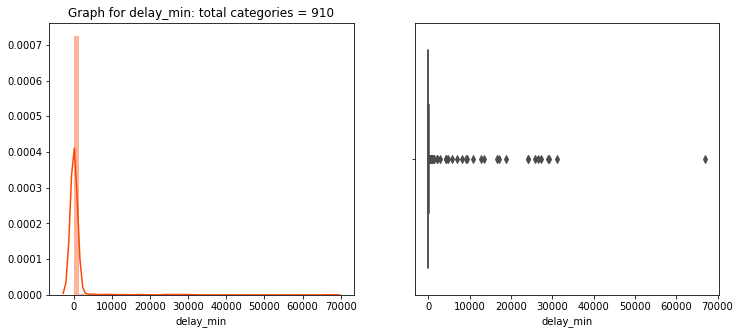

Most data are within 2 to 16.
Median is 4.0
The data are usually below 228.
Anything above 38 and below -20 is an outlier.
There are 456132 outliers.
Maximum occurence is 66972 of 10.0.




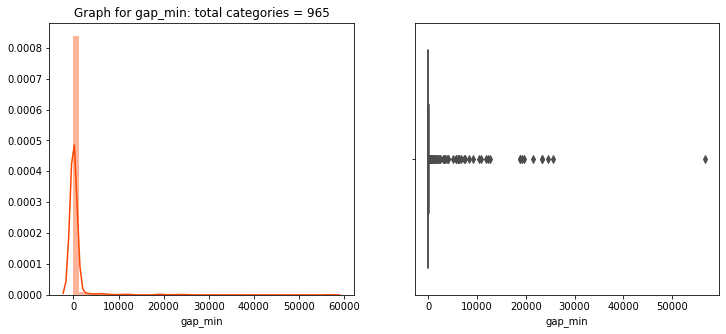

Most data are within 2 to 18.
Median is 5.0
The data are usually below 673.
Anything above 42 and below -22 is an outlier.
There are 454839 outliers.
Maximum occurence is 56804 of 20.0.




In [14]:
# Using a for loop to plot each continous variables and compute quantiles.
for col in bus_cont.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    cont_num = bus_cont[col].value_counts()
    chart = sns.distplot(cont_num, ax=ax[0], color="orangered", kde=True)
    #ax[0].set_xlabels()
    ax[0].set_title("Graph for %s: total categories = %d" %(col, len(cont_num)))
    sns.boxplot(cont_num, ax=ax[1], color="orangered")
    plt.show()

    compute_quantiles(cont_num)
    print('\n')

### Insights

Most graphs have a heavily skewed distribution, for example:
- the 29 Dufferin bus route number has 1390 records of delay compare to most bus routes only have between 3 to roughly 1650 records of delay.
- day 12 has 16100 records of delay.
- most delays are recorded at exactly 0 minute of the hour.
- most delays are 10 minutes long with 67000 occurences.
- most gaps are 20 mins long with 57000 occurences.

The relatively normal distributed graphs are:
- the graph for year shows that 2014 has the most recorded delays being 93000, where most years usually have between 63500 to 75000 delays
- the graph for month has 0 outliers and January being having the most recorded delay month with 44000 records.
- 6 AM has 49700 records of delay where most periods only have between 7600 to 29000 delays.


### 3.4.4 Correlation Matrix

<AxesSubplot:>

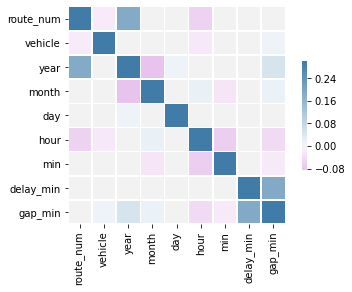

In [15]:
# check correlations between continuous variables
cmap = sns.diverging_palette(660, 600, as_cmap=True)
sns.heatmap(bus_cont.corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights:

- there's a positive correlation between route number and year, although it's unclear of what this mean. 
- gaps and delays are positively correlated shows that a long delay results in a long gap time from the bus ahead of the following bus.
- there are no signs showing that delays have any correlation other than gap time.

## 3.5 Analyzing Categorical Variables (using bar graphs and pivot tables)

In [16]:
# dataframe for categorical variables
bus_cat = bus_df[['year','month','day','hour','day_of_week', 'incident', 'at_station', 'direction_simp', 'delay_type']]

### 3.5.1 Bar graphs

Graph for year: total categories = 7


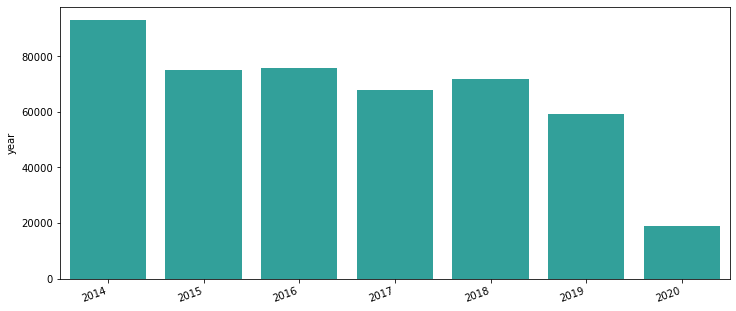

Graph for month: total categories = 12


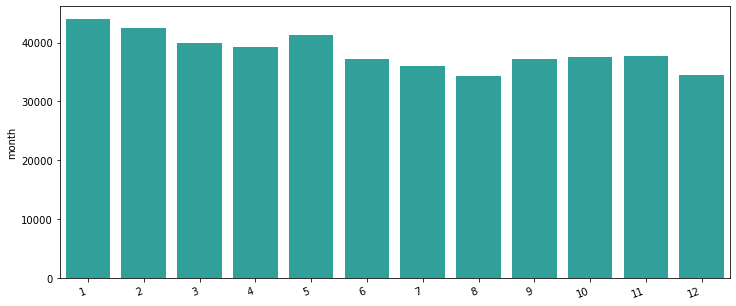

Graph for day: total categories = 31


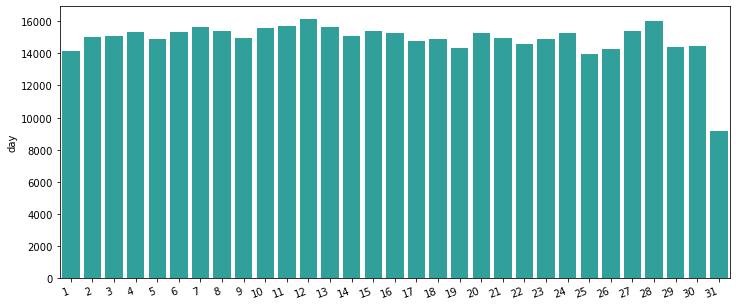

Graph for hour: total categories = 24


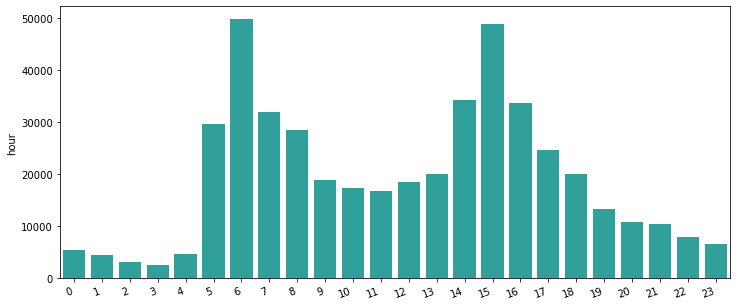

Graph for day_of_week: total categories = 7


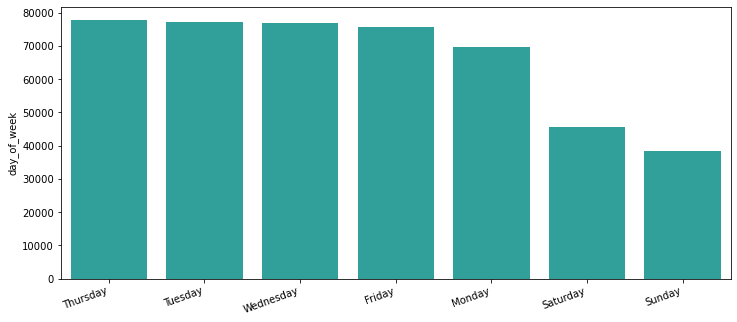

Graph for incident: total categories = 13


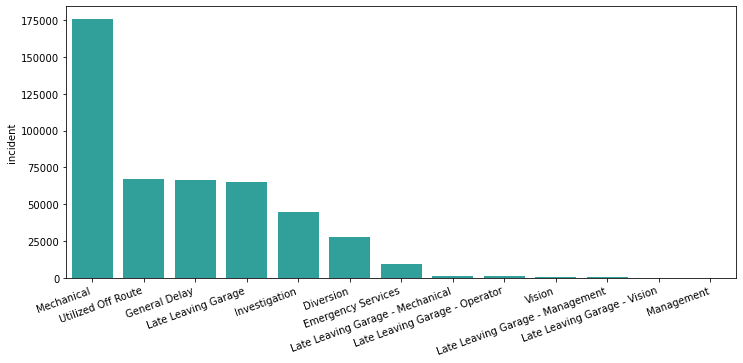

Graph for at_station: total categories = 2


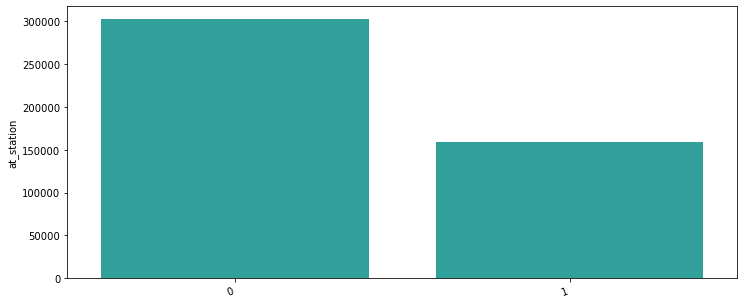

Graph for direction_simp: total categories = 5


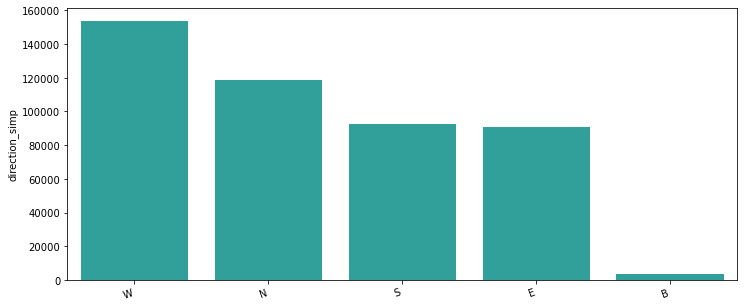

Graph for delay_type: total categories = 4


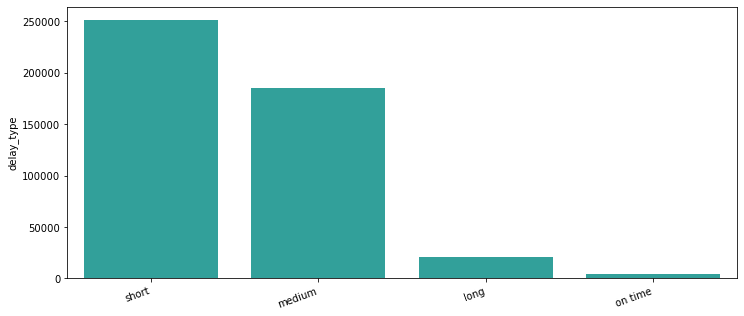

In [17]:
# Inspired by Ken Jee
# Using a for loop to plot each categorical variable.
for col in bus_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = bus_cat[col].value_counts()
    print("Graph for %s: total categories = %d" %(col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,color="lightseagreen")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()

### Insights
Graph for year:
- this graph shows a clear message that 2014 has the most number of delay recorded 
- 2015 to 2019 has a relatively even distribution of delays recorded.
- Although 2020 has the least number of delay recorded, keep in mind that we only have 6 months of data from 2020 and there's a pandemic in this year.

Graph for month:
- January being the peak of this graph might be a sign of holiday effect.

Graph for day:
- we observe that day 12 and day 28 peak in this graph meaning that delays are more likely to happen in the middle and end of the month.

Graph of hour:
- 6 AM and 3 PM have the most recorded delays. Midnight to 4 AM have the least record of delays.

Graph for day:
- We observe that the weekdays have almost twice more delays than weekends.

Graph for incident:
- The distribution of this graph looks right skewed.
- The mechanical incident dominates this graph being the incident with most delay counts and more than twice of the second place incident.
- Anything with a combination of late leaving garage, vision and management almost have no effects to the bus delays.

Graph for at_station:
- This graph shows that almost 300000 buses weren't delay at stations and 150000 were delay at stations.

Graph for direction:
- More buses are like to be delayed going west followed by north, south and east.
- Buses going both ways are not likely to be delay as there are not many buses operates on going both ways.

Graph for delay type:
- Most delays are relatively short range from 0 to 10 mins.

## 3.6 Top 10 Location

### Top 10 Location and station

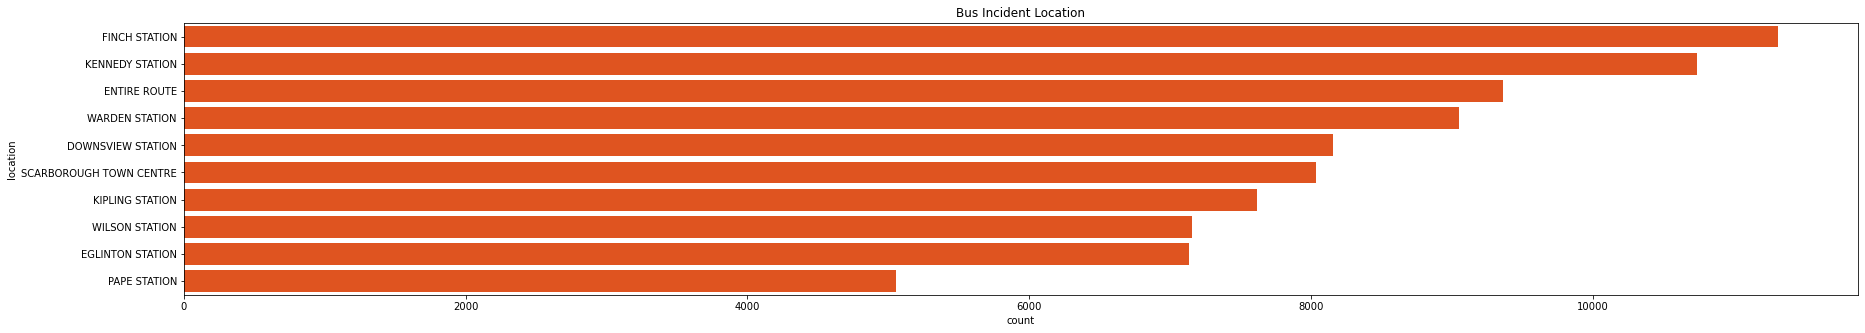

In [18]:
fig, ax = plt.subplots(1,1,figsize=(30,5))

sns.countplot(y=bus_df.location, order= bus_df.location.value_counts().iloc[:10].index, color="orangered");
ax.set_title("Bus Incident Location");
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)


Although Younge University Line is the fourth on our list, there's actually no delays on the record

### 3.5.2 Pivot Tables

In [19]:
bus_df.columns

Index(['exact_date', 'route_num', 'exact_time', 'day_of_week', 'location',
       'incident', 'delay_min', 'gap_min', 'direction', 'vehicle', 'year',
       'month', 'day', 'hour', 'min', 'at_station', 'delay_type',
       'direction_simp'],
      dtype='object')

Using pivot tables to look at delay vs everything else 

In [20]:
bus_df_pivots  = bus_df[['exact_date', 'route_num', 'exact_time', 'day_of_week', 'location',
       'incident', 'gap_min', 'direction', 'vehicle', 'year',
       'month', 'day', 'hour', 'min', 'at_station', 'delay_type',
       'direction_simp', 'delay_min']]

In [21]:
try:
    for col in bus_df_pivots.columns:
        print(col)
        print(pd.pivot_table(bus_df_pivots, index = col , values="delay_min").sort_values("delay_min", ascending=False))
except ValueError:
    pass

exact_date
              delay_min
exact_date             
2014-03-01  1305.183246
2018-05-27   112.169643
2018-07-29   108.495935
2019-08-04    92.813333
2018-05-26    92.729730
...                 ...
2020-03-24     9.442623
2015-01-21     9.361789
2015-01-26     9.288660
2020-03-23     8.887218
2020-03-25     8.780347

[2343 rows x 1 columns]
route_num
            delay_min
route_num            
474        280.000000
140        191.500000
135        162.006803
359        114.000000
62          88.768649
...               ...
459          1.000000
157          1.000000
906          0.750000
383          0.666667
907          0.500000

[335 rows x 1 columns]
exact_time
              delay_min
exact_time             
8:55:00 PM  1040.365145
4:02:00 AM   212.097561
4:50:00 AM   175.393293
5:14:00 AM   140.665339
5:15:00 AM   140.459552
...                 ...
6:23:00 AM     9.200809
6:44:00 AM     9.188889
7:09:00 AM     9.159132
7:01:00 AM     9.125307
7:27:00 AM     8.512360

[1440 ro

In [22]:
# Not only buses heading west have the most number of delays, they also have the longest delay time.

In [23]:
pd.set_option("display.max_rows", 50)

In [24]:
pd.pivot_table(bus_df, index=["incident","direction_simp"], values="delay_min", aggfunc="count").sort_values("delay_min", ascending=False)

delay_min
incident                     direction_simp           
General Delay                W                   55150
Mechanical                   N                   49355
                             E                   42248
                             S                   41013
                             W                   40554
...                                                ...
Management                   E                       2
                             S                       1
Vision                       B                       1
Late Leaving Garage - Vision B                       1
Management                   W                       1

[64 rows x 1 columns]

In [25]:
pd.pivot_table(bus_df[bus_df.direction_simp == "W"], index="incident", values="delay_min").sort_values("delay_min", ascending=False)

,delay_min
incident,
Diversion,205.628280
General Delay,16.950771
Emergency Services,13.110021
Investigation,12.212528
Vision,11.577778
Mechanical,11.353751
Late Leaving Garage - Mechanical,11.193103
Late Leaving Garage - Operator,11.155797
Late Leaving Garage,10.612266


In [26]:
pd.pivot_table(bus_df, index="direction_simp", values="delay_min")

,delay_min
direction_simp,
B,20.491929
E,16.210356
N,16.187035
S,17.050201
W,28.699581


In [27]:
pd.pivot_table(bus_df_pivots, index= "Incident", columns="at_station", values="delay_min", aggfunc="count")

KeyError: 'Incident'

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
bus_df_notna = bus_df[bus_df['location'].notna()]

In [ ]:
words = " ".join(bus_df_notna['location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

# list of unwanted words
#unwanted = ['station']

text = " ".join([ele for ele in words_filtered])#if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()